# PCA for demension reduction using Covariance Matrix, SKLEARN, SVD

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Get the data

file_path = 'spotify52kData.csv'
df = pd.read_csv(file_path)


In [4]:
# check for missing values since PCA cannot be performed on data with NaNs
df.isnull().sum()

songNumber          0
artists             0
album_name          0
track_name          0
popularity          0
duration            0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:
# check data type and one-hot encode categorical data
df.dtypes

songNumber            int64
artists              object
album_name           object
track_name           object
popularity            int64
duration              int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [7]:
# we will only get the float data columns for the PCA purpose
df_pca_features = df[['speechiness','acousticness','instrumentalness','liveness','valence','tempo']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca_features)

In [15]:
# compute the centriod

centriod = np.mean(scaled_data, axis = 0)

# Centring the matrix

centered_matrix = scaled_data - centriod

# get covariance matrix

cov_matrix = np.cov(centered_matrix, rowvar=False)

# get the eigenvector and eigenvalues

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sort the eigenvalues pick k components 

sorted_indices = np.argsort(eigenvalues)[::-1] 
sorted_eigenvalues = eigenvalues[sorted_indices]  
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# output the final data
sorted_eigenvalues,sorted_eigenvectors


(array([1.42642781, 1.32830542, 1.08976778, 0.79961759, 0.70778532,
        0.64821148]),
 array([[ 0.54244869,  0.39182613, -0.17361641, -0.18211988, -0.03486438,
         -0.69835225],
        [-0.11525672,  0.56575838,  0.3793418 , -0.61427686, -0.22857838,
          0.30520323],
        [-0.52437216,  0.28832605, -0.33028746, -0.1735457 ,  0.69236333,
         -0.15273191],
        [ 0.53895581,  0.28946503, -0.3717905 ,  0.1401014 ,  0.28279139,
          0.62282347],
        [ 0.35275035, -0.36239486,  0.54465038, -0.29559388,  0.59992307,
         -0.01759783],
        [ 0.05092125, -0.47763772, -0.53103213, -0.67258757, -0.16519915,
          0.08723141]]))

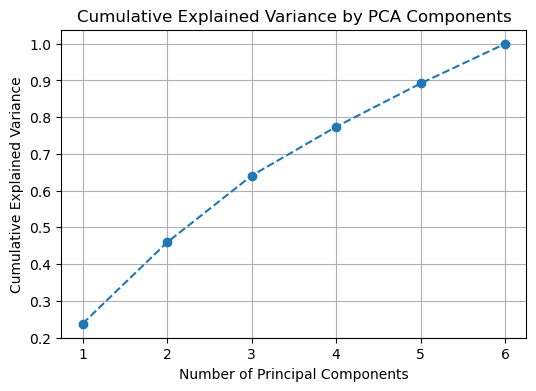

In [16]:
# Compute the explained variance ratio
explained_variance_ratio = sorted_eigenvalues / np.sum(sorted_eigenvalues)

# Compute the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)

# Step 7: Plot the cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [20]:
# Select the number of components that explain 95% of the variance
threshold = 0.95
k = np.argmax(cumulative_variance >= threshold) + 1  # Add 1 because indices start from 0
print(f"Number of components to explain {threshold * 100}% of the variance: {k}")

Number of components to explain 95.0% of the variance: 6


In [21]:
# Transform the original data using the top k components
selected_eigenvectors = sorted_eigenvectors[:, :k]
data_pca = np.dot(centered_matrix, selected_eigenvectors)

# Output
print("Sorted Eigenvalues:", sorted_eigenvalues)
print("Explained Variance Ratio:", explained_variance_ratio)
print("Cumulative Explained Variance:", cumulative_variance)
print(f"Transformed data with {k} components:\n", data_pca)

Sorted Eigenvalues: [1.42642781 1.32830542 1.08976778 0.79961759 0.70778532 0.64821148]
Explained Variance Ratio: [0.2377334  0.22137998 0.18162447 0.13326703 0.11796195 0.10803317]
Cumulative Explained Variance: [0.2377334  0.45911338 0.64073785 0.77400488 0.89196683 1.        ]
Transformed data with 6 components:
 [[ 1.2934574  -0.00900047  0.76288245  1.11172652  0.80650569 -0.03347234]
 [-0.67455367  1.76810685  1.64246607  0.07150284 -1.18863638  0.31347715]
 [-0.66344977  0.70564532  0.50512753  1.66950976 -0.99165066 -0.19351382]
 ...
 [ 0.43112241 -0.88038498  1.45796757  0.72599706  0.62858061 -0.5956405 ]
 [ 1.40570613 -0.68474327 -0.90073225 -0.60449706 -0.24285312 -0.90371945]
 [ 0.31051484 -1.70184567  1.13387593 -0.09918039  0.51416996 -0.63422422]]


## Sk-learn

In [22]:
# Compare with Sklearn
from sklearn.decomposition import PCA
pca = PCA()  # Initialize PCA model without specifying n_components initially
pca.fit(scaled_data)  # Fit the PCA model on the scaled data

pca_optimal = PCA(n_components=k)
data_pca_sklearn = pca_optimal.fit_transform(scaled_data)

# Output
print(f"Transformed data with {k} components:\n", data_pca_sklearn)

Transformed data with 6 components:
 [[ 1.2934574  -0.00900047  0.76288245 -1.11172652  0.80650569  0.03347234]
 [-0.67455367  1.76810685  1.64246607 -0.07150284 -1.18863638 -0.31347715]
 [-0.66344977  0.70564532  0.50512753 -1.66950976 -0.99165066  0.19351382]
 ...
 [ 0.43112241 -0.88038498  1.45796757 -0.72599706  0.62858061  0.5956405 ]
 [ 1.40570613 -0.68474327 -0.90073225  0.60449706 -0.24285312  0.90371945]
 [ 0.31051484 -1.70184567  1.13387593  0.09918039  0.51416996  0.63422422]]


# SVD

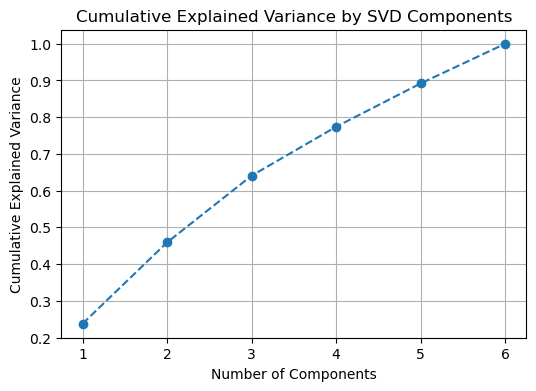

Number of components to explain 95.0% of the variance: 6
Transformed data with 6 components:
 [[-1.2934574  -0.00900047  0.76288245 -1.11172652 -0.80650569  0.03347234]
 [ 0.67455367  1.76810685  1.64246607 -0.07150284  1.18863638 -0.31347715]
 [ 0.66344977  0.70564532  0.50512753 -1.66950976  0.99165066  0.19351382]
 ...
 [-0.43112241 -0.88038498  1.45796757 -0.72599706 -0.62858061  0.5956405 ]
 [-1.40570613 -0.68474327 -0.90073225  0.60449706  0.24285312  0.90371945]
 [-0.31051484 -1.70184567  1.13387593  0.09918039 -0.51416996  0.63422422]]


In [23]:
# Step 2: Apply Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(centered_matrix, full_matrices=False)

# U: Left singular vectors (projections of the original data onto the principal components)
# S: Singular values (related to the variance explained by each component)
# Vt: Right singular vectors (principal components / directions)

# Step 3: Compute explained variance from singular values
explained_variance_SVD = (S ** 2) / (len(centered_matrix) - 1)  # Variance explained by each component
explained_variance_ratio_SVD = explained_variance_SVD / np.sum(explained_variance_SVD)

# Step 4: Cumulative explained variance
cumulative_variance_SVD = np.cumsum(explained_variance_ratio)

# Step 5: Plot cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(range(1, len(cumulative_variance_SVD) + 1), cumulative_variance_SVD, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by SVD Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

# Step 6: Choose the number of components (k) to explain 95% variance
threshold = 0.95
k = np.argmax(cumulative_variance_SVD >= threshold) + 1
print(f"Number of components to explain {threshold * 100}% of the variance: {k}")

# Step 7: Reduce the dimensionality of the data using the top k components
# Project the original data onto the top k right singular vectors (Vt[:k])
data_reduced_SVD = np.dot(centered_matrix, Vt[:k].T)

print(f"Transformed data with {k} components:\n", data_reduced_SVD)

NOTE: Due to the nature of SVD, the output matrix will have filped sign compares to sklearn and Covariance Matrix PCA. This will not affect furthur tasks.